In [1]:
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import save_image
from generator import botr_generator, generate_single
import matplotlib.pyplot as plt
from utils import load_coco_categories, load_coco_info, save_json
from metaplex import format_attributes
import os
import json

In [2]:
coco_dset = torchvision.datasets.CocoDetection(
    "val2017",
    "annotations/stuff_val2017.json", 
    transform=transforms.ToTensor())

# coco_categories = load_coco_categories()
coco_info = load_coco_info("annotations/stuff_val2017.json")

# botr_gen = botr_generator(
#     coco_dset,
#     coco_info,
#     dims=(1024,1024),
#     batch_size=1,
#     fill_target=0.99,
#     max_step_fill=0.01,
#     step_fill_jitter=0.1,
#     for_nn=True)

botr_gen = generate_single(
    coco_dset,
    coco_info,
    dims=(1024,1024),
    fill_target=0.99,
    max_step_fill=0.07,
    step_fill_jitter=0.1,
    sharpness=10,
    for_nn=False)

loading annotations into memory...
Done (t=0.66s)
creating index...
index created!


test image generator

px filled 46095 fill percent 0.043959617614746094
px filled 52396 fill percent 0.049968719482421875
px filled 80330 fill percent 0.07660865783691406
px filled 94241 fill percent 0.0898752212524414
px filled 246045 fill percent 0.23464679718017578
px filled 246075 fill percent 0.23467540740966797
px filled 269450 fill percent 0.25696754455566406
px filled 277298 fill percent 0.2644519805908203
px filled 325958 fill percent 0.31085777282714844
px filled 331175 fill percent 0.31583309173583984
px filled 444611 fill percent 0.4240140914916992
px filled 446432 fill percent 0.425750732421875
px filled 534151 fill percent 0.5094060897827148
px filled 534792 fill percent 0.5100173950195312
px filled 624417 fill percent 0.5954904556274414
px filled 724400 fill percent 0.6908416748046875
px filled 757111 fill percent 0.7220373153686523
px filled 869559 fill percent 0.8292760848999023
px filled 978472 fill percent 0.9331436157226562
px filled 1038037 fill percent 0.9899492263793945
px filled 1038

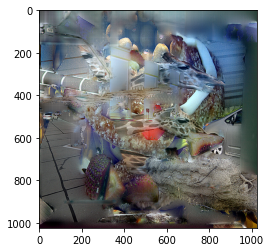

{'water': 0, 'food-stuff': 0.17900657653808594, 'raw-material': 0.049968719482421875, 'textile': 0.026639938354492188, 'solid': 0.12144756317138672, 'sky': 0.05680561065673828, 'other': 0.223907470703125, 'building': 0.00197601318359375, 'furniture-stuff': 0, 'ground': 0.1311349868774414, 'wall': 0.14480018615722656, 'ceiling': 0, 'window': 0.046405792236328125, 'plant': 0, 'structural': 0.008095741271972656, 'floor': 0}


In [10]:
composite, metadata, name = next(botr_gen)
print(name)
plt.imshow(composite)
plt.show()
print(metadata)

In [6]:
import json
# easy quick way to save a batch that you like 
def save_image_batch(image_batch, metadatas, names, path='generated/'):
    index = 0
    data_base_path = os.path.join(path, "raw")
    if not os.path.exists(data_base_path):
        os.mkdir(data_base_path)
    for img, data, name in zip(image_batch, metadatas, names):
        img_path = os.path.join(path, f"{name}.png")
        data_path = os.path.join(data_base_path, f"{name}.json")

        if os.path.isfile(img_path) or os.path.isfile(data_path):
            while os.path.isfile(img_path) and os.path.isfile(data_path):
                index += 1
                img_path = os.path.join(path, f"{name}.png")
                data_path = os.path.join(data_base_path, f"{name}.json")
        # save_json(data_path, cat)
        with open(data_path, 'w', encoding='utf-8') as f:
            json.dump(data, f, ensure_ascii=False, indent=3)

        if img.shape[0] > 3:
            img = img.permute(2, 0, 1)
        save_image(img, img_path)
        print(f'\n saved img: {img_path} \n saved data {data_path}')


In [11]:
save_image_batch([composite], [metadata], [name], path='generated/')


 saved img: generated/otfwgss.png 
 saved data generated/raw/otfwgss.json


In [30]:
import numpy as np

word_len = np.random.randint(3, 20)

sorted_attrs = dict(sorted(metadata.items(), key=lambda item: item[1], reverse=True))

name = ""
attr_idx = 0

while len(name) < word_len:
    print(attr_idx)
    key = list(sorted_attrs.keys())[attr_idx]
    slice_len = int((sorted_attrs[key] * word_len) ** 2)
    if slice_len == 0:
        slice_len = 1
    name += key[:slice_len]
    attr_idx += 1
print(name)

0
1
2
3
othestfg


torch.Size([3, 1024, 1024]) {'supercategory': 'electronic', 'id': 75, 'name': 'remote'}


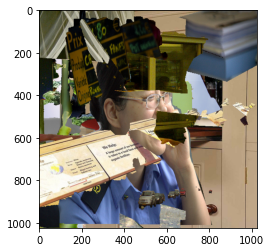

torch.Size([3, 1024, 1024]) {'supercategory': 'sports', 'id': 35, 'name': 'skis'}


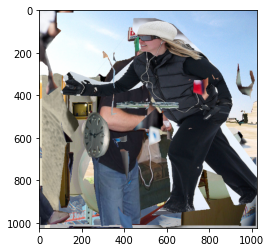

torch.Size([3, 1024, 1024]) {'supercategory': 'food', 'id': 55, 'name': 'orange'}


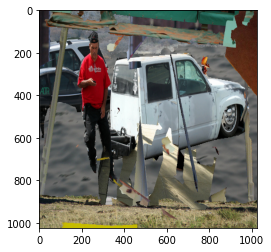

torch.Size([3, 1024, 1024]) {'supercategory': 'food', 'id': 57, 'name': 'carrot'}


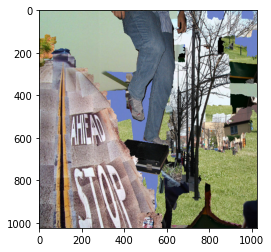

In [19]:
for img, cat in zip(image_batch, categories):
    print(img.shape, cat)
    # save_image(img.permute(2, 0, 1), 'generated/img1.png')
    plt.imshow(img.permute(1,2,0))
    plt.show()


In [12]:

    # plt.subplot(1,3,1)
    # plt.title("mask")
    # plt.imshow(rand_mask)
    # plt.subplot(1,3,2)
    # plt.title("original img")
    # plt.imshow(img)
    # plt.subplot(1,3,3)
    # plt.title("masked image")
    # plt.imshow(masked)
    # plt.show()
# def test_fn():
def generator(dataset, info, dims, fill_target=0.99, max_step_fill=0.1, step_fill_jitter = 0.3, for_nn=False):

  transform = transforms.Compose(
  [transforms.ToTensor(), 
  transforms.Resize(size=dims),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

  # img_batch = []
  # metadata_batch = []
  # b = 0
  # batch_ready = False
  # while not batch_ready:
  # for b in range(batch_size):
  total_px_filled = 0
  composite_mask = torch.zeros((dims[0], dims[1], 1))
  composite = torch.zeros((dims[0], dims[1], 3))
  unique_categories = list(set([k["supercategory"] for k in info['categories']]))
  metadata = {}
  metadata = {key: 0 for key in unique_categories}
  map = {}
  name = ""
  # words = []

  for cat in info['categories']:
      map[cat['id']] = cat["supercategory"]

  while total_px_filled / (dims[0] * dims[1]) < fill_target:
    idx = np.random.randint(0, dataset.__len__())
    img, ann = dataset[idx]
    rand_ann = random.choice(ann)    
    img = TF.resize(img, size=dims)
    img = img.permute(1,2,0)
    rand_mask = dataset.coco.annToMask(rand_ann)
    rand_mask = torch.as_tensor(rand_mask).unsqueeze(0)
    rand_mask = TF.resize(rand_mask, size=(dims[0], dims[1]))
    rand_mask = torch.permute(rand_mask,(1,2,0))
    px_filled = torch.count_nonzero(rand_mask).item()
    fill_percent = px_filled / (dims[0] * dims[1])
    # masked = img * rand_mask
    category = map[rand_ann['category_id']]
    fill_mask = torch.zeros_like(composite_mask)
    fill_mask = torch.logical_or(rand_mask, composite_mask)
    fill_mask[composite_mask == 1] = 0
    px_filled = torch.count_nonzero(fill_mask).item()
    fill_percent = px_filled / (dims[0] * dims[1])
    this_step_fill = (torch.rand((1,)) * step_fill_jitter) + max_step_fill

    if fill_percent > this_step_fill or fill_percent == 0:
      continue
    else:
      category = map[rand_ann['category_id']]
      metadata[category] += fill_percent
      composite_mask = torch.logical_or(composite_mask, rand_mask)

      composite = blend_masked_rgb(
        img_A=img.numpy(), # use the image so the blending works with a wider area
        img_B=composite.numpy(), 
        mask_A=fill_mask.numpy(), 
        mask_B=composite_mask.numpy(),
        kernel_size=1,
        kernel_sig=1)

      composite = torch.as_tensor(composite)
      # composite += fill_mask * img
      total_px_filled = torch.count_nonzero(composite_mask)
      print(f'px filled {total_px_filled} fill percent {total_px_filled/(dims[0]*dims[1])}')
      letters_category = int(((len(category)) * fill_percent)**4)
      name += category[:letters_category]

  composite = sharpen(composite.permute(2, 0, 1), 10).permute(1, 2, 0)

  composite = (composite - torch.min(composite)) / ((torch.max(composite) - torch.min(composite)))
  if for_nn:
    composite = composite.permute(2, 0, 1)

  return composite, metadata, name